### Description

Sleep monitoring includes sleep staging, body positioning, respiratory events, heart rate, oxygen saturation and snoring, measured concurrently over three nights.

### Introduction 
<!-- just for sleep: shortened from the original introduction in the data doc -->
Obstructive sleep apnea (OSA) is a sleep disorder in which a person’s breathing is interrupted during sleep due to obstruction of the upper airway as a result of relaxation of the throat muscles. This obstruction can lead to pauses in breathing for short periods of time, which can cause loud snoring, reduction in the  blood oxygen levels, stress response, awakening and fragmented sleep.

A home sleep apnea test (HSAT) is a non-invasive test used to diagnose sleep apnea. During an HSAT, a patient wears a portable device overnight to monitor their breathing, heart rate, oxygen levels, snoring, and other sleep patterns. The device records this data and it is then analyzed by clinically-validated algorithms that compute apnea-related indices. The data can also be used to study sleep architecture and other aspects of sleep, such as heart rate variability (HRV) and arrhythmia.

The device used for sleep monitoring in the Human Phenotype Project is the FDA-approved WatchPAT-300 by Itamar Medical. This device contains 5 sensors: An actigraph worn on the wrist; a pulse oximeter and a Peripheral Arterial Tone (PAT) probe worn on the finger; and a microphone and accelerometer worn on the chest for respiratory effort, snoring and body position measurement (RESBP).

The PAT probe measures changes in the volume of blood vessels by applying a uniform pressure field over the covered finger, preventing venous blood accumulation while measuring changes in the flow within the probe with a photoplethysmogram (PPG) sensor. The measured PAT signal is a physiological signal that reflects changes in the autonomic nervous system caused by respiratory disturbances during sleep. WatchPAT's algorithm analyzes the PAT signal amplitude, heart rate, and oxygen saturation to identify and classify sleep-related breathing problems.

The device's algorithms provide 3 main indices for diagnosis of OSA: Apnea/Hypopnea Index (AHI), Respiratory Disturbance Index (RDI), Oxygen Desaturation Index (ODI). The device's algoithms also provide indices for diagnosis of Atrial Fibrillation (not FDA-approved yet): Premature beats per minute, Atrial fibrillation longest event.

In addition to the above, the device's algorithms provide statistics on sleep architecture. Furthermore, we use [NeuroKit2](https://neuropsychology.github.io/NeuroKit/) ([Makowski et al., 2021](https://doi.org/10.3758/s13428-020-01516-y)) to compute HRV indices from the PAT channel.

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
The WatchPAT device is given to participants during the visit to the clinical testing center who then record 3 nights of sleep at home during the following two weeks (see figure below). Participants who use CPAP/BiPap devices are asked to report the usage of CPAP/BiPap devices in the HPP App per the monitored nights.

![image alt](sleep_info_figure1.png)

Figure 1: WatchPAT-300 device. (Source: Itamar Medical)

General guidelines: Once the device is turned on it cannot be turned off, and should therefore be turned on only when the participant is ready to go to sleep. The device should not be removed if the participant needs to get up during the night. The device will turn off automatically when the participant wakes up. The PAT probe is replaced each night, and 3 probes are provided to each participant. Finally, the device is returned to the clinic and the data is analyzed.

PAT setup: It is recommended to apply the WatchPAT device on the non-dominant hand. The PAT probe can be worn on any finger, except the thumb. In the case of large fingers, the pinky is recommended. Before use, it is recommended to remove tight clothes, rings, watches and other jewelry. Artificial nails and nail polish should be removed from the test finger, and the fingernail should be cut short. The finger is inserted into the probe until reaching its end, until the sticker marked TOP is on the top of the finger above the nail. The finger is then pressed against a hard surface. Finally, the top tab is removed.

RESBP setup: Trim thick chest hair, if needed. Stick the sensor to the center of the upper chest bone, just below the front of the neck. The image on the RESBP sensor should be facing up. Secure the sensor using the provided sticker on its back and additional medical tape.

WatchPAT device setup: It is strapped on the wrist of the non-dominant hand.

### Data availability 
<!-- for the example notebooks -->
The information is stored in 2 main statistics parquet files: `sleep.parquet`, `hrv.parquet` (computed using NeuroKit2); In multiple events parquets and in multiple time series parquets / EDF files containing sensor channels for each night of logging.

```{mermaid}
flowchart LR;

Sensor(sleep sensor):::sensor --> Raw(raw channel):::raw
Raw -->|zzzPAT| Events(sleep events):::event
Raw -->|NeuroKit2| Extracted(computed stats)
Events --> Extracted
Events -->|zzzPAT| Summary(summary stats):::stat
```

### Summary of available data 
<!-- for the data browser -->
The data comprises of 3 levels of processing:

1. Raw channels: A data frame of temporal data - values and times - for each of 12 source channels.
2. Events: A data frame of annotated events based on the manufacturer’s analysis of the raw channels. Each row contains the event, its main source channel, its start time and end time.
3. Summary statistics: A data frame of computed features provided by the manufacturer based on the above channels and events. Some of the summary stats are also computed separately for different sleep stages and body positions. Additional computed features, such as the ones related to heart rate variability (HRV, using NeuroKit2) and sleep fragmentation, are computed by Pheno.ai.

![available data](sleep_data.png)

### Relevant links

* [Pheno Knowledgebase](https://knowledgebase.pheno.ai/datasets/009-sleep.html)
* [Pheno Data Browser](https://pheno-demo-app.vercel.app/folder/9)

In [1]:
#| echo: false
import pandas as pd
pd.set_option("display.max_rows", 500)

In [2]:
from pheno_utils import PhenoLoader

In [3]:
pl = PhenoLoader('sleep')
pl

PhenoLoader for sleep with
473 fields
3 tables: ['sleep', 'hrv', 'age_sex']

# Data dictionary

In [4]:
pl.dict

,field_string,description_string,folder_id,feature_set,field_type,strata,data_coding,array,pandas_dtype,units,...,stability,sexed,debut,completed,transformation,list_of_tags,min_plausible_value,max_plausible_value,dependency,parent_dataframe
tabular_field_name,,,,,,,,,,,,,,,,,,,,,
collection_timestamp,Collection timestamp,Collection timestamp,9,"sleep,sleep_raw",Datetime,Primary,NaN,Multiple,"datetime64[ns, Asia/Jerusalem]",Time,...,Accruing,Both sexes,2020-01-15,NaN,NaN,Sleep Monitoring,NaN,NaN,NaN,NaN
collection_date,Collection date,Collection date,9,"sleep,sleep_raw",Date,Primary,NaN,Multiple,datetime64[ns],Date,...,Accruing,Both sexes,2020-01-15,NaN,NaN,Sleep Monitoring,NaN,NaN,NaN,NaN
night,Night,Night,9,"sleep,sleep_raw",Integer,Primary,NaN,Multiple,int,NaN,...,Accruing,Both sexes,2020-01-15,NaN,NaN,Sleep Monitoring,NaN,NaN,NaN,NaN
warnings,Warnings,Analysis warnings,9,"sleep,sleep_raw",Categorical (multiple),Primary,009_04,Multiple,object,Text,...,Accruing,Both sexes,2020-01-15,NaN,NaN,Sleep Monitoring,NaN,NaN,NaN,NaN
timezone,Timezone,Timezone,9,"sleep,sleep_raw",Categorical (single),Auxiliary,001_03,Multiple,category,Text,...,Accruing,Both sexes,2020-01-15,NaN,NaN,Sleep Monitoring,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
REM,REM,REM,9,events_time_series,rows: event,NaN,NaN,NaN,string,Text,...,Accruing,NaN,NaN,NaN,NaN,Sleep Monitoring,NaN,NaN,NaN,events_time_series
REM Period,REM Period,REM Period,9,events_time_series,rows: event,NaN,NaN,NaN,string,Text,...,Accruing,NaN,NaN,NaN,NaN,Sleep Monitoring,NaN,NaN,NaN,events_time_series
Resp. Event,Resp. Event,Resp. Event,9,events_time_series,rows: event,NaN,NaN,NaN,string,Text,...,Accruing,NaN,NaN,NaN,NaN,Sleep Monitoring,NaN,NaN,NaN,events_time_series


# Plot histogram and ecdf for ahi at baseline visit


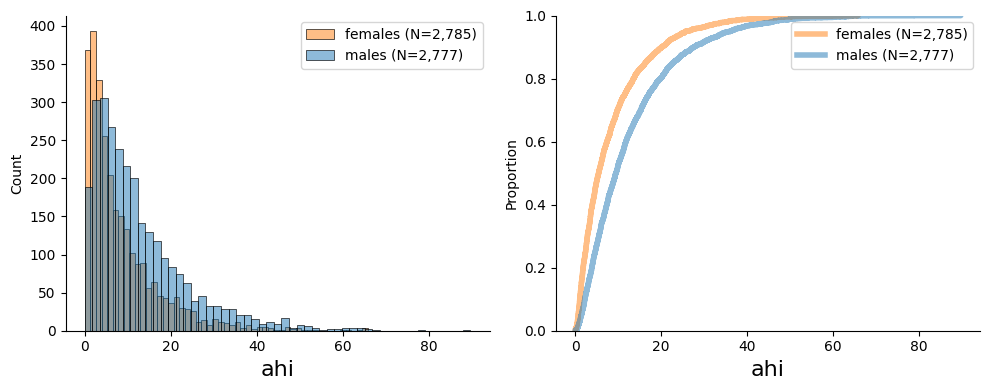

,count,mean,std,min,25%,50%,75%,max
ahi,5562.0,10.593943,10.356211,0.0,3.2825,7.35,14.4625,89.74


In [5]:
from pheno_utils.basic_plots import hist_ecdf_plots

col = "ahi"
df = pl[[col] + ["age", "sex", "collection_date"]].loc[:,:,"00_00_visit",0,:]

# plot histogram and ecdf
hist_ecdf_plots(df.dropna(subset=[col,"sex", "age"]), col, gender_col="sex")

# stats
display(df[col].describe().to_frame().T)